In [1]:
using DrWatson
@quickactivate "Doran_etal_2022"

using Muon
using LinearAlgebra
using Distances
using UMAP
using StatsPlots

In [2]:
pdir = plotsdir("BB673_umaps") |> mkpath

"/Users/ben/projects/Doran_etal_2022/plots/BB673_umaps"

In [3]:
biobank = readh5mu(joinpath(datadir(), "exp_pro", "BB673", "BB673.h5mu"))

MuData object 673 ✕ 11296
└ metabolites_foldchange
  AnnData object 673 ✕ 38
└ metabolites_millimolar
  AnnData object 673 ✕ 10
└ oggs
  AnnData object 673 ✕ 11248

In [4]:
UP7047_NCOLS = 10117
SPImtx = biobank["oggs"].obsp["inferredSPIdist_UP7047"][:, :] ./ UP7047_NCOLS;

In [5]:
using StatsBase

In [6]:
bbmtx = biobank["oggs"].X[:, :];

## UMaps of all 673 Isolates

In [7]:
nonzerocols = findall(sum(bbmtx, dims=1)[:] .> 0);
zbbmtx = mapslices(zscore, Float32.(bbmtx[:,nonzerocols]), dims=1);

In [8]:
bbusv = svd(zbbmtx);

In [9]:
sqrt(673)

25.942243542145693

In [90]:
oggembedding = umap(zbbmtx', 2; metric=CorrDist(), n_neighbors=30, n_epochs=300);

In [91]:
top10pc_embedding = umap(bbusv.U[:, 1:10]', 2; metric=CorrDist(), n_neighbors=30, n_epochs=300);

In [96]:
spectral_embedding = umap(SPImtx, 2; metric=:precomputed, n_neighbors=30, n_epochs=300);

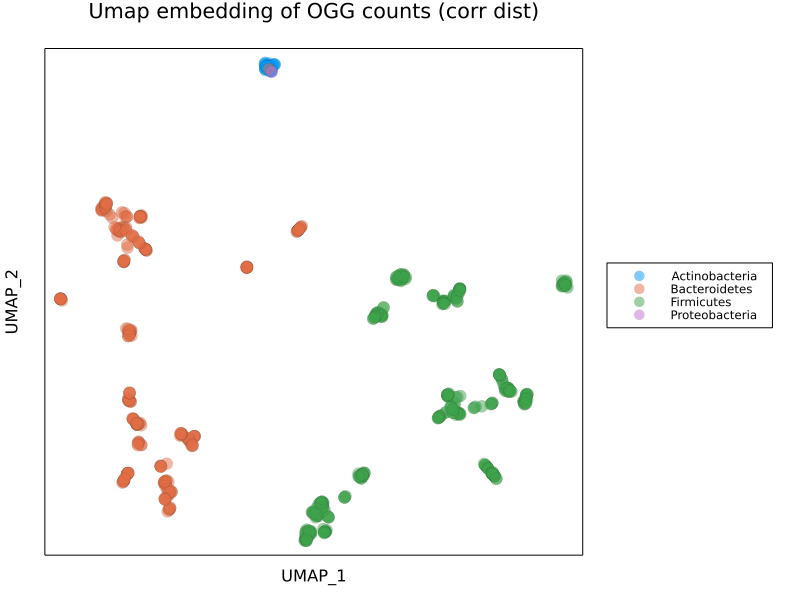

In [107]:
plot(
    title="Umap embedding of OGG counts (corr dist)",
    legend=:outerright,
    framestyle=:box,
    tickdirection=:none,
    grid=:none,
    ticks=:none,
    xlabel="UMAP_1",
    ylabel="UMAP_2",
    margin=5Plots.Measures.mm,
)
scatter!(oggembedding[1, :], oggembedding[2,:], 
    group=biobank.obs.phylum,
    size=(800,600),
    markersize=7,
    markerstrokewidth=0.1,
    alpha=.5,
    )

In [108]:
savefig(joinpath(pdir, "BB673_UMAP_zscored-oggs_corrdist_nn=30_epochs=300.pdf"))

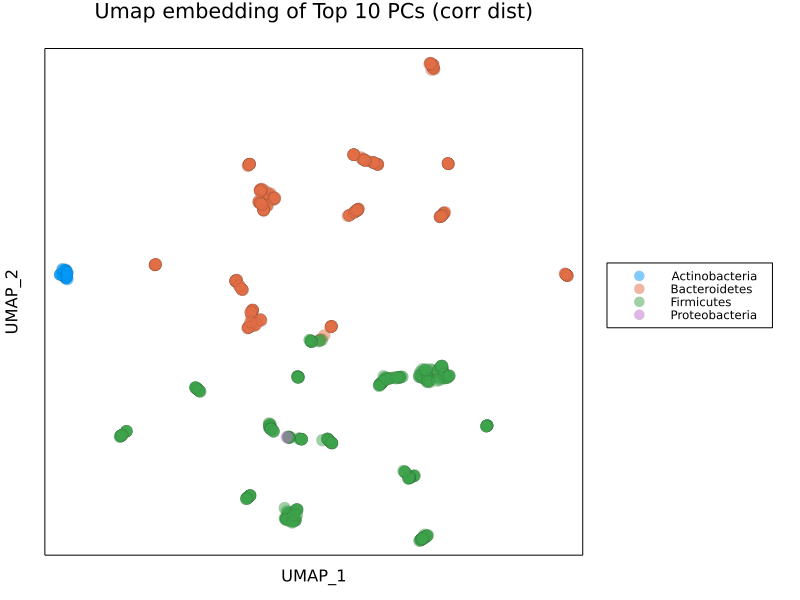

In [113]:
plot(
    title="Umap embedding of Top 10 PCs (corr dist)",
    legend=:outerright,
    framestyle=:box,
    tickdirection=:none,
    grid=:none,
    ticks=:none,
    xlabel="UMAP_1",
    ylabel="UMAP_2",
    margin=5Plots.Measures.mm,
)
scatter!(top10pc_embedding[1, :], top10pc_embedding[2,:], 
    group=biobank.obs.phylum,
    size=(800,600),
    markersize=7,
    markerstrokewidth=0.1,
    alpha=.5,
    )

In [114]:
savefig(joinpath(pdir, "BB673_UMAP_zscored-top10PCs_corrdist_nn=30_epochs=300.pdf"))

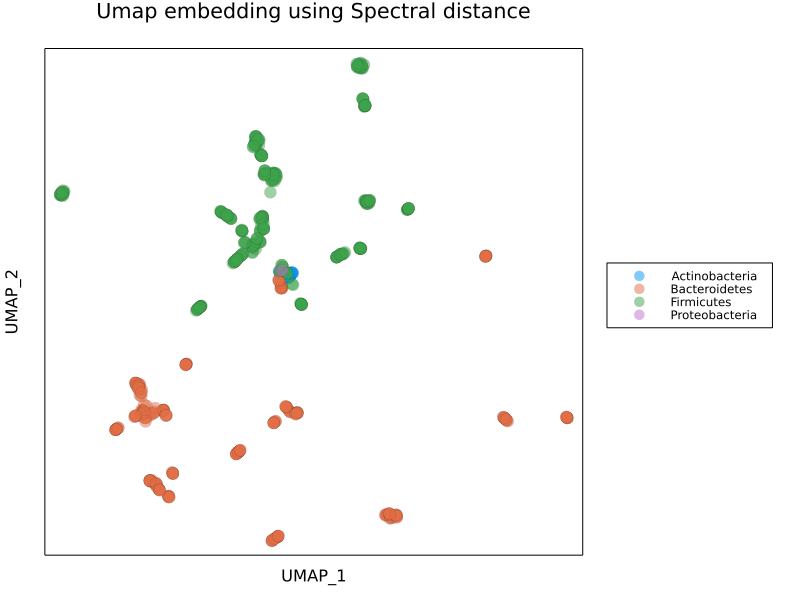

In [111]:
plot(
    title="Umap embedding using Spectral distance",
    legend=:outerright,
    framestyle=:box,
    tickdirection=:none,
    grid=:none,
    ticks=:none,
    xlabel="UMAP_1",
    ylabel="UMAP_2",
    margin=5Plots.Measures.mm,
)
scatter!(spectral_embedding[1, :], spectral_embedding[2,:], 
    group=biobank.obs.phylum,
    size=(800,600),
    markersize=7,
    markerstrokewidth=0.1,
    alpha=.5,
    )

In [112]:
savefig(joinpath(pdir, "BB673_UMAP_spectraldistance_nn=30_epochs=300.pdf"))

## Umaps of Lachnospiriceae

In [10]:
biobank.obs.family

673-element Vector{String}:
 "Bacteroidaceae"
 "Bacteroidaceae"
 "Bacteroidaceae"
 ""
 "Bacteroidaceae"
 "Bacteroidaceae"
 "Bacteroidaceae"
 ""
 "Bacteroidaceae"
 ""
 ⋮
 "Odoribacteraceae"
 "Odoribacteraceae"
 "Bacteroidaceae"
 "Odoribacteraceae"
 "Prevotellaceae"
 "Bacteroidaceae"
 "Bacteroidaceae"
 "Odoribacteraceae"
 "Prevotellaceae"

In [11]:
islachno = contains.(biobank.obs.family, "Lachno")
sum(islachno)

348

In [12]:
first(biobank.obs.family[islachno])

"Lachnospiraceae"

In [13]:
bbusv_lachno = svd(zbbmtx[islachno, :]);

In [14]:
sqrt(348)

18.65475810617763

In [15]:
oggembedding_lachno = umap(zbbmtx[islachno, :]', 2; metric=CorrDist(), n_neighbors=20, n_epochs=300);

In [16]:
top10pc_embedding_fulllachno = umap(bbusv.U[islachno, 1:10]', 2; metric=CorrDist(), n_neighbors=20, n_epochs=300);

In [17]:
top10pc_embedding_onlylachno = umap(bbusv_lachno.U[:, 1:10]', 2; metric=CorrDist(), n_neighbors=20, n_epochs=300);

In [18]:
spectral_embedding_lachno = umap(SPImtx[islachno, islachno], 2; metric=:precomputed, n_neighbors=20, n_epochs=300);

In [26]:
gr()

Plots.GRBackend()

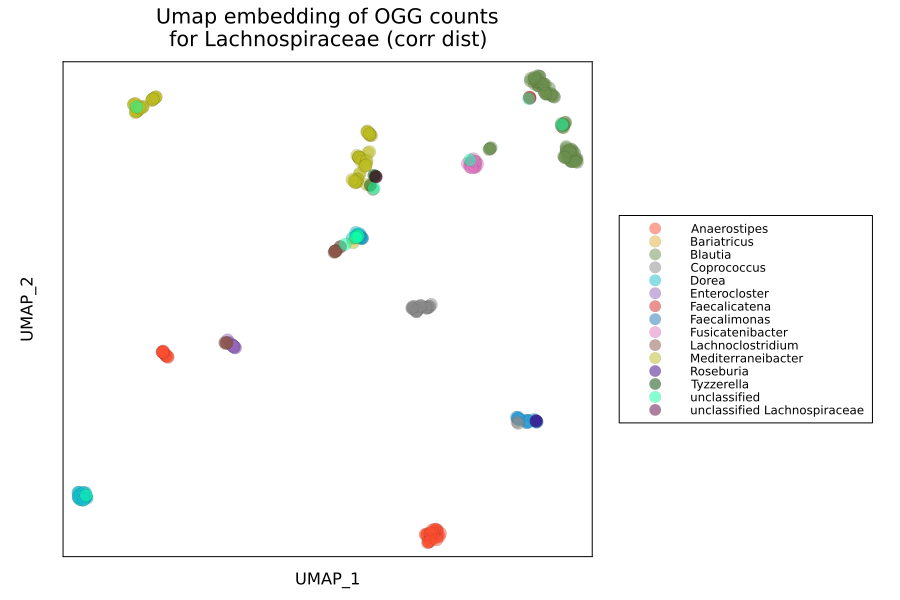

In [27]:
plot(
    title="Umap embedding of OGG counts\nfor Lachnospiraceae (corr dist)",
    legend=:outerright,
    framestyle=:box,
    tickdirection=:none,
    grid=:none,
    ticks=:none,
    xlabel="UMAP_1",
    ylabel="UMAP_2",
    margin=5Plots.Measures.mm,
    leftmargin=10Plots.Measures.mm,
)
scatter!(oggembedding_lachno[1, :], oggembedding_lachno[2,:], 
    group=biobank.obs.genus[islachno],
    # hover=biobank.obs_names[islachno],
    size=(900,600),
    markersize=7,
    markerstrokewidth=0.1,
    c=permutedims(palette(:glasbey_hv_n256).colors.colors),
    alpha=.5,
    )

In [171]:
# savefig(joinpath(pdir, "BB673-lachno_UMAP_zscored-oggs_corrdist_nn=20_epochs=300.pdf"))

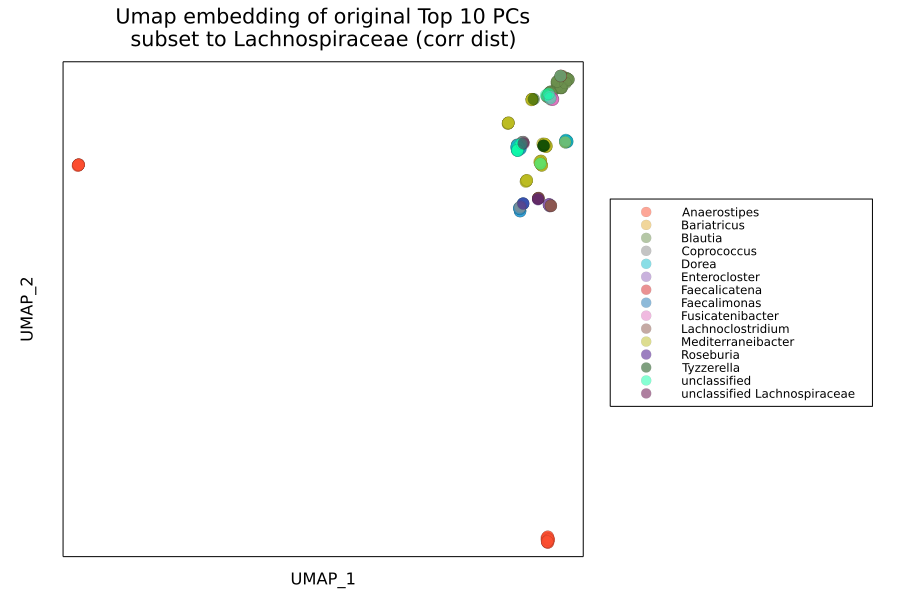

In [172]:
plot(
    title="Umap embedding of original Top 10 PCs\nsubset to Lachnospiraceae (corr dist)",
    legend=:outerright,
    framestyle=:box,
    tickdirection=:none,
    grid=:none,
    ticks=:none,
    xlabel="UMAP_1",
    ylabel="UMAP_2",
    margin=5Plots.Measures.mm,
    leftmargin=10Plots.Measures.mm,
)
scatter!(top10pc_embedding_fulllachno[1, :], top10pc_embedding_fulllachno[2,:], 
    group=biobank.obs.genus[islachno],
    size=(900,600),
    markersize=7,
    markerstrokewidth=0.1,
    c=permutedims(palette(:glasbey_hv_n256).colors.colors),
    alpha=.5,
    )

In [173]:
savefig(joinpath(pdir, "BB673-fulllachno_UMAP_zscored-top10PCs_corrdist_nn=30_epochs=300.pdf"))

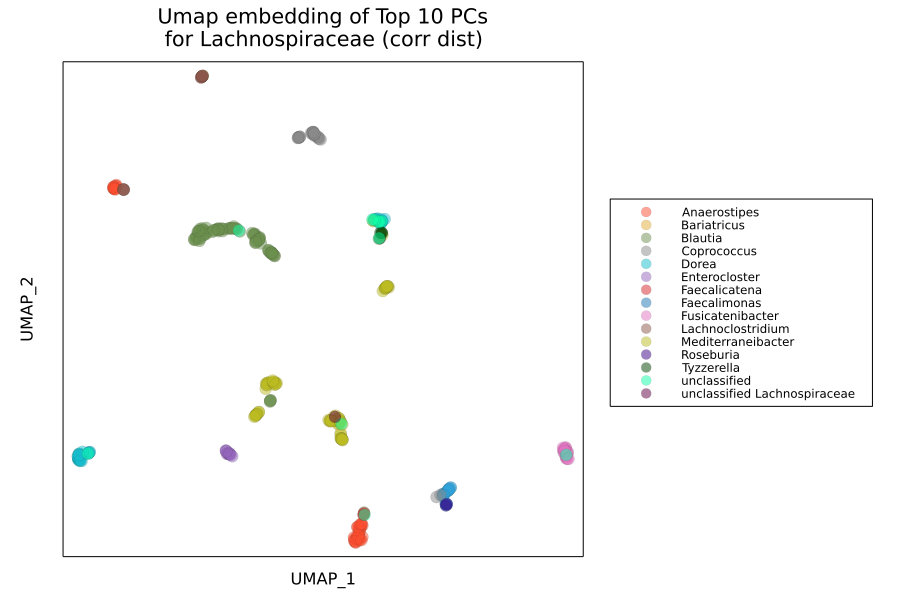

In [174]:
plot(
    title="Umap embedding of Top 10 PCs\nfor Lachnospiraceae (corr dist)",
    legend=:outerright,
    framestyle=:box,
    tickdirection=:none,
    grid=:none,
    ticks=:none,
    xlabel="UMAP_1",
    ylabel="UMAP_2",
    margin=5Plots.Measures.mm,
    leftmargin=10Plots.Measures.mm,
)
scatter!(top10pc_embedding_onlylachno[1, :], top10pc_embedding_onlylachno[2,:], 
    group=biobank.obs.genus[islachno],
    size=(900,600),
    markersize=7,
    markerstrokewidth=0.1,
    c=permutedims(palette(:glasbey_hv_n256).colors.colors),
    alpha=.5,
    )

In [175]:
savefig(joinpath(pdir, "BB673-onlylachno_UMAP_zscored-top10PCs_corrdist_nn=30_epochs=300.pdf"))

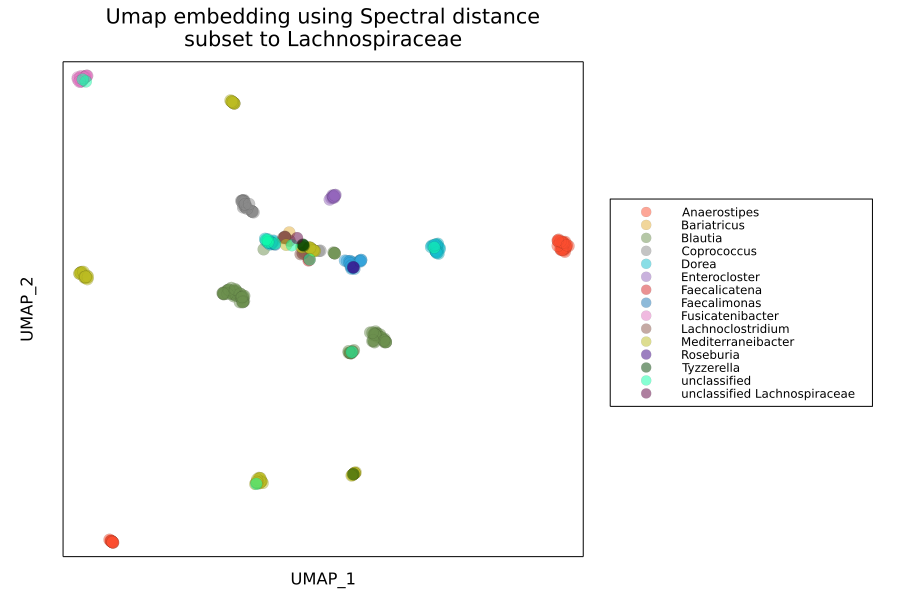

In [176]:
plot(
    title="Umap embedding using Spectral distance\nsubset to Lachnospiraceae",
    legend=:outerright,
    framestyle=:box,
    tickdirection=:none,
    grid=:none,
    ticks=:none,
    xlabel="UMAP_1",
    ylabel="UMAP_2",
    margin=5Plots.Measures.mm,
    leftmargin=10Plots.Measures.mm,
)
scatter!(spectral_embedding_lachno[1, :], spectral_embedding_lachno[2,:], 
    group=biobank.obs.genus[islachno],
    size=(900,600),
    markersize=7,
    markerstrokewidth=0.1,
    c=permutedims(palette(:glasbey_hv_n256).colors.colors),
    alpha=.5,
    )

In [177]:
savefig(joinpath(pdir, "BB673-lachno_UMAP_spectraldistance_nn=30_epochs=300.pdf"))